In [1]:
%matplotlib inline

import json
from pathlib import Path
import pandas as pd

In [2]:
results_path = Path('../results/')

In [3]:
ladder = 'gen7vgc2018'
log_df = None
for path in sorted(results_path.glob('{}*log'.format(ladder))):
    n_units = str(path).split('_')[-2]
    
    df = pd.read_json(str(path))
    df = df[['epoch', 'main/loss', 'validation/main/loss']]
    df.columns = [str(col) + '_' + n_units if 'loss' in str(col) else str(col)  for col in df.columns]
    if log_df is None:
        log_df = df
    else:
        log_df = log_df.merge(df, on='epoch', suffixes=('', ''))

In [4]:
log_df

,epoch,main/loss_128,validation/main/loss_128,main/loss_256,validation/main/loss_256,main/loss_32,validation/main/loss_32,main/loss_64,validation/main/loss_64
0,1,88.126729,84.106594,86.845185,80.775737,90.418422,85.473505,89.151390,85.244406
1,2,78.818088,74.021551,73.315102,68.184106,84.974323,83.414521,82.918990,78.821642
2,3,70.207444,67.673061,64.627471,63.960268,80.177870,77.296153,75.181346,72.615703
3,4,65.150551,64.454830,61.175763,61.449232,74.859568,73.461823,69.717580,68.303738
4,5,62.253539,62.746749,59.904731,60.519202,71.510813,70.511467,65.949321,65.873703
5,6,60.766917,61.313286,58.817813,60.554495,68.660327,68.308281,63.557193,63.784970
6,7,59.599787,60.722610,58.310735,59.909808,66.399278,66.660267,61.852359,62.672810
7,8,58.989606,60.835635,57.760403,59.866747,64.611358,65.329822,60.704472,62.118319
8,9,58.650145,60.585930,57.500381,59.458779,63.149006,63.950927,59.981102,61.690819
9,10,58.124767,59.949526,57.355686,59.265824,61.977500,63.254706,59.672009,61.293160


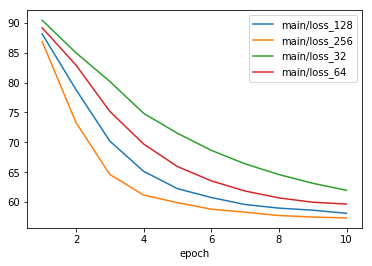

In [5]:
cols = [col for col in log_df.columns if 'validation/main/loss' not in col]
log_df[cols].plot(x='epoch')

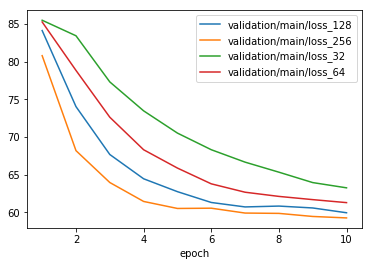

In [6]:
cols = [col for col in log_df.columns if 'validation/main/loss' in col] + ['epoch']
log_df[cols].plot(x='epoch')